# Chapter 16 : 신경망 훈련하기

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## 16.1 신경망으로 데이터 분류하기

## 16.2 손글씨 숫자 이미지 분류하기

### 16.2.1 64차원 이미지 벡터 만들기

In [6]:
from sklearn import datasets
digits = datasets.load_digits()

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

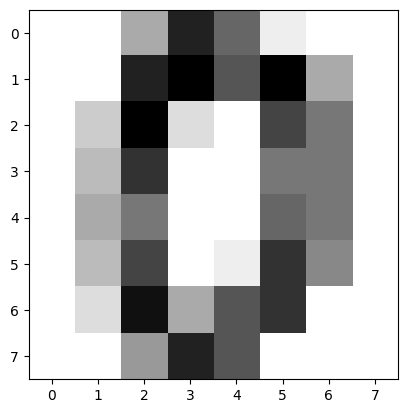

In [8]:
plt.imshow(digits.images[0], cmap = plt.cm.gray_r)

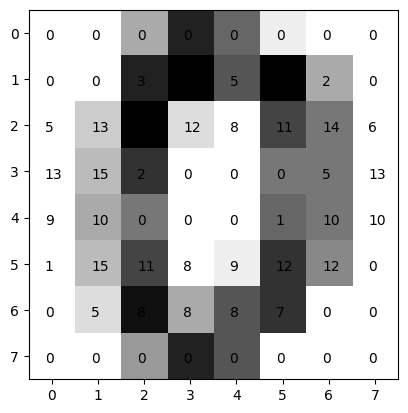

In [9]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
for i in range(0,8):
    for j in range(0,8):
        plt.gca().text(i-0.15, j+0.15, int(digits.images[0][i][j]))

In [10]:
np.matrix.flatten(digits.images[0])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
# 픽셀 값이 0~15 사이이기 때문에 / 15
np.matrix.flatten(digits.images[0]) / 15 

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

### 16.2.2 랜덤 숫자 분류기 만들기

In [12]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [13]:
v = np.matrix.flatten(digits.images[0]) / 15
result = random_classifier(v)
result

array([0.67729002, 0.44310932, 0.69774278, 0.59174852, 0.47829202,
       0.4085263 , 0.05523029, 0.24208932, 0.289803  , 0.37148406])

In [14]:
list(result).index(max(result))

2

In [15]:
digits.target[0]

0

### 16.2.3 숫자 분류기의 성능 측정하기

In [16]:
def test_digit_classify(classifier, test_count = 1000):
    correct = 0
    # digit 데이터셋에서 images의 이미지와 target의 정답의 순서쌍을 만들어 순회한다.
    for img, target in zip(digits.images[:test_count], digits.target[:test_count]):
        v = np.matrix.flatten(img) / 15
        output = classifier(v)
        answer = list(output).index(max(output))
        if answer == target:
            correct += 1
    return (correct / test_count)

In [17]:
test_digit_classify(random_classifier)

0.1

### 16.2.4 연습문제

16.2 6장에서 이미지의 평균을 계산한 방법과 똑같이, 데이터셋에서 9라 적힌 이미지 모두의 평균을 구하라. 결과 이미지를 플로팅하고 그 모습을 설명하라.

In [18]:
def average_img(i):
    imgs = [img for img, target in zip(digits.images[1000:], digits.target[1000:]) if target==i]
    return sum(imgs) / len(imgs)

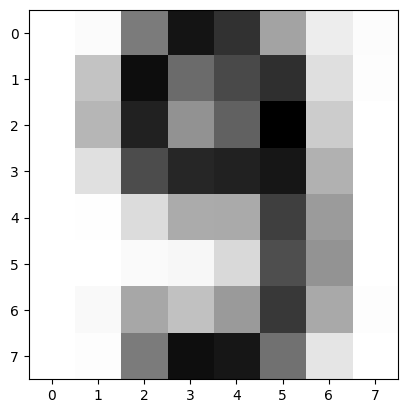

In [19]:
plt.imshow(average_img(9), cmap=plt.cm.gray_r)

16.3 테스트 데이터셋에서 각 숫자별 평균 이미지를 구한 뒤, 평가 대상인 이미자와 각 평균을 비교하여 동작함으로써 랜덤 분류기보다 성능이 더 나은 분류기를 만들어라. 구체적으로는 대상 이미지와 각 평균 숫자 이미지 간의 내적 결과를 리턴하라.

In [20]:
avg_digits = [np.matrix.flatten(average_img(i)) for i in range(10)]
def compare_to_avg(v):
    return [np.dot(v,avg_digits[i]) for i in range(10)]

In [21]:
test_digit_classify(compare_to_avg)

0.853

## 16.3 신경망 설계하기

## 16.4 파이썬으로 신경망 만들기

### 16.4.1 파이썬으로 다층 퍼셉트론(MLP) 클래스 구현하기

In [22]:
class MLP():
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [np.random.rand(n,m) for m, n in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]]

In [23]:
nn = MLP([2,3])

In [24]:
nn.weights

[array([[0.23548708, 0.30870353],
        [0.65307663, 0.99887095],
        [0.06153065, 0.40612243]])]

In [25]:
nn.biases

[array([0.63652322, 0.18796896, 0.1159271 ])]

### 16.4.2 다층 퍼셉트론 결과 구하기

In [26]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

In [27]:
class MLP():
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [np.random.rand(n,m) for m, n in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]]
    def feedforward(self, v):
        activations = [] # 빈 활성 리스트를 초기화한다.
        a = v
        activations.append(a)
        for w,b in zip(self.weights, self.biases):
            z = w @ a + b # 벡터 z는 가중치 행렬과 직전 계층 활성을 곱한 뒤 편향 벡터를 더한 것이다.
            a = [sigmoid(x) for x in z]
            activations.append(a)
        return activations
    def evaluate(self,v):
        return np.array(self.feedforward(v)[-1])

### 16.4.3 MLP 분류 성능 테스트하기

In [28]:
nn = MLP([64,16,10])
v = np.matrix.flatten(digits.images[0]) / 15
nn.evaluate(v)

array([0.99892628, 0.99993029, 0.99979896, 0.99991704, 0.99986761,
       0.99960619, 0.99991666, 0.99998319, 0.99992663, 0.99989607])

In [29]:
test_digit_classify(nn.evaluate)

0.099

## 16.5 경사하강법으로 신경망 훈련하기

### 16.5.1 훈련 작업을 최소화 문제로 표현하기

### 16.5.2 역전파로 그라디언트 계산하기

### 16.5.3 scikit-learn으로 훈련 자동화하기

In [30]:
x = np.array([np.matrix.flatten(img) for img in digits.images[:1000]]) / 15.0
y = digits.target[:1000]

In [71]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,), 
                    activation='logistic', 
                    max_iter=100, 
                    verbose=10, # 훈련과정에서 상세 로그(verbose log)를 출력하도록 설정한다.
                    random_state=1, # 다층 퍼셉트론의 가중치와 편향에 랜덤 값을 넣어 초기화한다.
                    learning_rate_init=.1)

In [72]:
mlp.fit(x,y)

Iteration 1, loss = 2.21958598
Iteration 2, loss = 1.56912978
Iteration 3, loss = 0.98970277
Iteration 4, loss = 0.57473464
Iteration 5, loss = 0.34048448
Iteration 6, loss = 0.21495855
Iteration 7, loss = 0.14366771
Iteration 8, loss = 0.11077020
Iteration 9, loss = 0.08764273
Iteration 10, loss = 0.07193546
Iteration 11, loss = 0.06020348
Iteration 12, loss = 0.04961899
Iteration 13, loss = 0.03979645
Iteration 14, loss = 0.03334502
Iteration 15, loss = 0.02996006
Iteration 16, loss = 0.02603968
Iteration 17, loss = 0.02355514
Iteration 18, loss = 0.02137348
Iteration 19, loss = 0.01967878
Iteration 20, loss = 0.01751214
Iteration 21, loss = 0.01617330
Iteration 22, loss = 0.01460386
Iteration 23, loss = 0.01408517
Iteration 24, loss = 0.01270504
Iteration 25, loss = 0.01191634
Iteration 26, loss = 0.01114222
Iteration 27, loss = 0.01045989
Iteration 28, loss = 0.00983648
Iteration 29, loss = 0.00920912
Iteration 30, loss = 0.00890851
Iteration 31, loss = 0.00843426
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(16,),
              learning_rate_init=0.1, max_iter=100, random_state=1, verbose=10)

In [73]:
mlp.predict(x)[0]

0

In [85]:
def sklearn_trained_classify(v):
    return mlp.predict([v])

In [86]:
test_digit_classify(sklearn_trained_classify)

0.099

### 16.5.4 연습문제

16.11 테스트할 데이터셋의 예시 범위를 지정할 수 있도록 test_digit_classify 함수를 수정하라. 1,000개 예시를 훈련한 뒤 500개 예시에 관한 결과를 보여라.

In [87]:
def test_digit_classify(classifier, start=0, test_count=1000):
    correct = 0
    end = start + test_count
    for img, target in zip(digits.images[start:end], digits.target[start:end]):
        v = np.matrix.flatten(img) / 15.
        output = classifier(v)
        answer = list(output).index(max(output))
        if answer == target:
            correct += 1
    return (correct/test_count)

In [88]:
test_digit_classify(sklearn_trained_classify, start=1000, test_count=500)

0.104

16.12 거리의 제곱을 활요한 비용 함수를 사용할 떄, 랜덤하게 생성된 다층 퍼셉트론에서 처음 훈련 예시 1,000개에 대해 비용이 얼마나 발생하는지 구하라. 또한 scikit-learn의 다층 퍼셉트론에 대해서도 비용을 구하라.

In [89]:
def y_vec(digit):
    return np.array([1 if i == digit else 0 for i in range(0,10)])

In [90]:
def cost_one(classifier,x,i):
    return sum([(classifier(x)[j] - y_vec(i)[j])**2 for j in range(10)])

In [91]:
def total_cost(classifier):
    return sum([cost_one(classifier,x[j],y[j]) for j in range(1000)])/1000.

In [92]:
total_cost(nn.evaluate)

8.995984141268062

16.13 MLPClassifier의 가중치와 편향을 각각 coefs_ 속성과 intercepts_ 속성을 통해 추출하라. 이 가중치와 편향을 우리가 만든 MLP클래스에 대입해서 결과로 얻은 다층 퍼셉트론이 숫자를 잘 분류함을 보아라.

In [94]:
nn = MLP([64,16,10])

In [95]:
nn.weights = [w.T for w in mlp.coefs_]

In [96]:
nn.biases = mlp.intercepts_

In [97]:
test_digit_classify(nn.evaluate,start=1000,test_count=500)

0.962

16.14 10장에서 만든 SymPy를 사용해서 다음 시그모이드 함수의 도함수를 자동으로 구한 뒤, 결과가 $\sigma(x)(1-\sigma(x))$ 와 같음을 보여라.
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [100]:
from sympy import *
X = symbols('x')
diff(1 / (1+exp(-X)),X)

exp(-x)/(1 + exp(-x))**2